# Circular billiard

Circular billiard, with analytical solution of speed and directions after bounce.

In [6]:
import numpy as np
from shapely.geometry import LineString
import matplotlib.pyplot as plt

In [7]:
# Circular boundary radius
r = 1.

# Ball starting point and speed components
x0 = 0.5
y0 = 0.2
vx = 1
vy = -2.3

# number of bounces
Nb = 50

# spatial increment for animation rendering
dx = 0.1

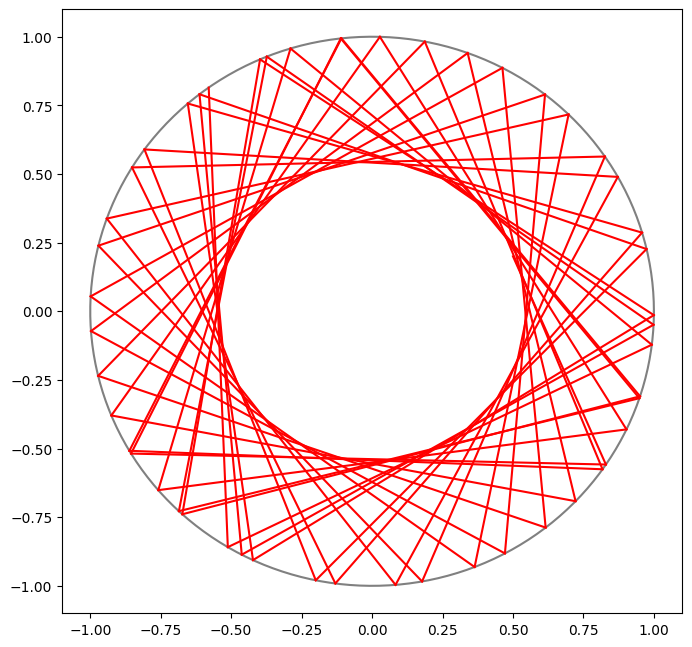

In [8]:
# draw circular boundary
angle = np.linspace(0, 2*np.pi, 180)  
xc = r*np.cos(angle) 
yc = r*np.sin(angle) 
fig, ax = plt.subplots(figsize=(8,8),dpi=100) 
ax.plot(xc,yc,color="grey") 

# define boundary as LineString, need to find intersection with ball trajectory
boundary = LineString(np.column_stack((xc,yc)))

# global trajectory
X = []
Y = []

for _ in range(Nb):
    
    # define trajectory crossing the boundary
    xt = np.linspace(x0+r/100*vx, x0+r*vx, 100)  
    yt = np.linspace(y0+r/100*vy, y0+r*vy, 100)
    trajectory = LineString(np.column_stack((xt,yt)))

    # find intersection
    intersection = boundary.intersection(trajectory)
    xb,yb = intersection.xy
        
    # draw path to intersection
    d = np.sqrt((xb[0]-x0)**2+(yb[0]-y0)**2) # traveled distance
    NP = int(d/dx) # number of points to store for animation
    x = np.linspace(x0,xb[0],NP)  
    y = np.linspace(y0,yb[0],NP)
    ax.plot(x,y,'-',color="red")
    
    # save path segment points for animation, 
    # removing first point to avoid double counting
    X = np.concatenate((X, x[1:]), axis=None)
    Y = np.concatenate((Y, y[1:]), axis=None)
    
    # compute new speed components after collision
    x0 = xb[0]
    y0 = yb[0]
    vx,vy = vx-2*(vx*x0/r+vy*y0/r)*x0/r, vy-2*(vx*x0/r+vy*y0/r)*y0/r

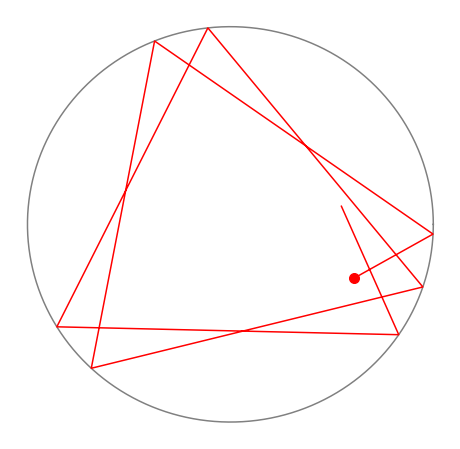

In [214]:
# plot one point in time
i = 100

fig, ax = plt.subplots(figsize=(8,8),dpi=72) 
ax.plot(xc,yc,color="grey")
ax.plot(X[:i+1],Y[:i+1],'-',color="red")
ax.plot(X[i],Y[i],'o',color="red",markersize=10)
plt.axis('off')
plt.show()

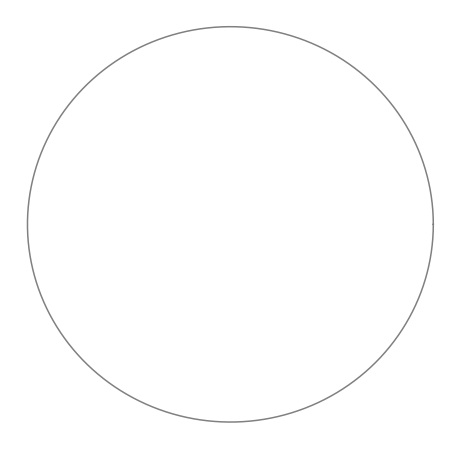

In [215]:
fig, ax = plt.subplots(figsize=(8,8),dpi=72) 
ax.plot(xc,yc,color="grey")
trail, = ax.plot([],[],'-',color="red")
ball, = ax.plot([],[],'o',color="red",markersize=10)
plt.axis('off')
plt.show()

In [216]:
from matplotlib.animation import FuncAnimation, FFMpegWriter
%matplotlib inline
from IPython.display import HTML, Image

def billiard_init():
    trail.set_data([], [])
    ball.set_data([x0],[y0])
    return (trail,ball)

def billiard_animate(i):
    if i<len(X)-1:
        trail.set_data(X[:i+1],Y[:i+1])
    else:
        trail.set_data(X[:i],Y[:i])
    ball.set_data(X[i],Y[i])
    return (trail,ball)

anim = FuncAnimation(fig,billiard_animate,frames=range(len(X)),init_func=billiard_init,blit=True)

In [217]:
HTML(anim.to_html5_video())

In [220]:
anim.save('movies/circularbilliard.mp4', writer=FFMpegWriter(fps=30))

In [218]:
anim.save('gifs/circularbilliard.gif', writer='imagemagick', fps=30)

In [219]:
Image(url='gifs/circularbilliard.gif')